In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/DataScience/Data/cleaned_data_weather.csv'
df = pd.read_csv(file_path)

In [3]:
df_original_data = df

In [4]:
df['next_1_day_mean_temp'] = df_original_data['mean_temp'].shift(-1)
df['next_2_day_mean_temp'] = df_original_data['mean_temp'].shift(-2)
df['next_3_day_mean_temp'] = df_original_data['mean_temp'].shift(-3)
df['next_4_day_mean_temp'] = df_original_data['mean_temp'].shift(-4)
df['next_5_day_mean_temp'] = df_original_data['mean_temp'].shift(-5)
df['next_6_day_mean_temp'] = df_original_data['mean_temp'].shift(-6)
df['next_7_day_mean_temp'] = df_original_data['mean_temp'].shift(-7)
df['next_8_day_mean_temp'] = df_original_data['mean_temp'].shift(-8)
df['next_9_day_mean_temp'] = df_original_data['mean_temp'].shift(-9)
df['next_10_day_mean_temp'] = df_original_data['mean_temp'].shift(-10)
df['next_11_day_mean_temp'] = df_original_data['mean_temp'].shift(-11)
df['next_12_day_mean_temp'] = df_original_data['mean_temp'].shift(-12)
df['next_13_day_mean_temp'] = df_original_data['mean_temp'].shift(-13)
df['next_14_day_mean_temp'] = df_original_data['mean_temp'].shift(-14)
df['next_15_day_mean_temp'] = df_original_data['mean_temp'].shift(-15)
df['next_16_day_mean_temp'] = df_original_data['mean_temp'].shift(-16)
df['next_17_day_mean_temp'] = df_original_data['mean_temp'].shift(-17)
df['next_18_day_mean_temp'] = df_original_data['mean_temp'].shift(-18)
df['next_19_day_mean_temp'] = df_original_data['mean_temp'].shift(-19)
df['next_20_day_mean_temp'] = df_original_data['mean_temp'].shift(-20)
df['next_21_day_mean_temp'] = df_original_data['mean_temp'].shift(-21)
df['next_22_day_mean_temp'] = df_original_data['mean_temp'].shift(-22)
df['next_23_day_mean_temp'] = df_original_data['mean_temp'].shift(-23)
df['next_24_day_mean_temp'] = df_original_data['mean_temp'].shift(-24)
df['next_25_day_mean_temp'] = df_original_data['mean_temp'].shift(-25)
df['next_26_day_mean_temp'] = df_original_data['mean_temp'].shift(-26)
df['next_27_day_mean_temp'] = df_original_data['mean_temp'].shift(-27)
df['next_28_day_mean_temp'] = df_original_data['mean_temp'].shift(-28)
df['next_29_day_mean_temp'] = df_original_data['mean_temp'].shift(-29)
df['next_30_day_mean_temp'] = df_original_data['mean_temp'].shift(-30)

In [5]:
df.dropna(inplace=True)

#### cloud_cover processing

In [6]:
df['cloud_cover'].value_counts()

7.0    3107
6.0    2949
5.0    2292
8.0    1896
4.0    1815
3.0    1146
2.0     856
1.0     601
0.0     375
5.8       2
6.8       2
5.4       2
7.4       2
9.0       2
5.6       1
6.2       1
6.6       1
7.2       1
Name: cloud_cover, dtype: int64

In [7]:
condition = (df['cloud_cover'] % 1 != 0) | (df['cloud_cover'] > 8.0)

# 从DataFrame中去除满足条件的行
df = df[~condition]

In [8]:
df['cloud_cover'].value_counts()

7.0    3107
6.0    2949
5.0    2292
8.0    1896
4.0    1815
3.0    1146
2.0     856
1.0     601
0.0     375
Name: cloud_cover, dtype: int64

#### change the sunshine into hours

In [9]:
df['sunshine'] = df['sunshine'] * 60

<ipython-input-9-d19a2b1fcbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sunshine'] = df['sunshine'] * 60


#### change snow depth into a category value

In [10]:
df['snow_depth'].value_counts()

0.0     14907
1.0        45
2.0        23
4.0        15
3.0        15
5.0         6
6.0         4
7.0         4
8.0         4
10.0        2
12.0        2
11.0        2
9.0         1
0.4         1
18.0        1
13.0        1
15.0        1
16.0        1
22.0        1
0.8         1
Name: snow_depth, dtype: int64

In [11]:
df.loc[df['snow_depth'] > 0, 'snow_depth'] = 1.0

In [12]:
df['snow_depth'].value_counts()

0.0    14907
1.0      130
Name: snow_depth, dtype: int64

#### change the precipitation into category value

In [13]:
df['precipitation'].value_counts()

0.00     7897
0.20     1003
0.40      451
0.10      313
0.60      295
         ... 
53.10       1
18.70       1
25.40       1
20.00       1
0.46        1
Name: precipitation, Length: 261, dtype: int64

In [14]:
bins = [-float('inf'), 0.1, 2.5, 10, 50, float('inf')]
labels = [0, 1, 2, 3, 4]

df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

<ipython-input-14-c7ee6bde3366>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)


In [15]:
df['precipitation'].value_counts()

0    7897
1    4241
2    2329
3     566
4       4
Name: precipitation, dtype: int64

#### one-hot encoding

In [16]:
df_encoded = pd.get_dummies(df['cloud_cover'], prefix='cloud_cover')

df = pd.concat([df, df_encoded], axis=1)

df.drop('cloud_cover', axis=1, inplace=True)

In [17]:
df_encoded = pd.get_dummies(df['precipitation'], prefix='precipitation')

df = pd.concat([df, df_encoded], axis=1)

df.drop('precipitation', axis=1, inplace=True)

In [18]:
df_encoded = pd.get_dummies(df['snow_depth'], prefix='snow_depth')

df = pd.concat([df, df_encoded], axis=1)

df.drop('snow_depth', axis=1, inplace=True)

#### delete the date

In [19]:
del df['date']

In [20]:
df.head()

,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure,next_1_day_mean_temp,next_2_day_mean_temp,next_3_day_mean_temp,next_4_day_mean_temp,...,cloud_cover_6.0,cloud_cover_7.0,cloud_cover_8.0,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,snow_depth_0.0,snow_depth_1.0
0,420.0,52.0,2.3,-4.1,-7.5,101900.0,-2.6,-2.8,-2.6,-0.8,...,0,0,0,0,1,0,0,0,0,1
1,102.0,27.0,1.6,-2.6,-7.5,102530.0,-2.8,-2.6,-0.8,-0.5,...,1,0,0,1,0,0,0,0,0,1
2,0.0,13.0,1.3,-2.8,-7.2,102050.0,-2.6,-0.8,-0.5,1.5,...,0,0,0,1,0,0,0,0,0,1
3,0.0,13.0,-0.3,-2.6,-6.5,100840.0,-0.8,-0.5,1.5,6.9,...,0,0,1,1,0,0,0,0,0,1
4,120.0,29.0,5.6,-0.8,-1.4,102250.0,-0.5,1.5,6.9,3.7,...,1,0,0,1,0,0,0,0,0,1


#### normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'pressure']

scaler = MinMaxScaler()


df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

#### check if any INF or NAN

In [22]:
inf_check = np.isinf(df)
print(inf_check.any())

sunshine                 False
global_radiation         False
max_temp                 False
mean_temp                False
min_temp                 False
pressure                 False
next_1_day_mean_temp     False
next_2_day_mean_temp     False
next_3_day_mean_temp     False
next_4_day_mean_temp     False
next_5_day_mean_temp     False
next_6_day_mean_temp     False
next_7_day_mean_temp     False
next_8_day_mean_temp     False
next_9_day_mean_temp     False
next_10_day_mean_temp    False
next_11_day_mean_temp    False
next_12_day_mean_temp    False
next_13_day_mean_temp    False
next_14_day_mean_temp    False
next_15_day_mean_temp    False
next_16_day_mean_temp    False
next_17_day_mean_temp    False
next_18_day_mean_temp    False
next_19_day_mean_temp    False
next_20_day_mean_temp    False
next_21_day_mean_temp    False
next_22_day_mean_temp    False
next_23_day_mean_temp    False
next_24_day_mean_temp    False
next_25_day_mean_temp    False
next_26_day_mean_temp    False
next_27_

In [23]:
inf_check = np.isnan(df)
print(inf_check.any())

sunshine                 False
global_radiation         False
max_temp                 False
mean_temp                False
min_temp                 False
pressure                 False
next_1_day_mean_temp     False
next_2_day_mean_temp     False
next_3_day_mean_temp     False
next_4_day_mean_temp     False
next_5_day_mean_temp     False
next_6_day_mean_temp     False
next_7_day_mean_temp     False
next_8_day_mean_temp     False
next_9_day_mean_temp     False
next_10_day_mean_temp    False
next_11_day_mean_temp    False
next_12_day_mean_temp    False
next_13_day_mean_temp    False
next_14_day_mean_temp    False
next_15_day_mean_temp    False
next_16_day_mean_temp    False
next_17_day_mean_temp    False
next_18_day_mean_temp    False
next_19_day_mean_temp    False
next_20_day_mean_temp    False
next_21_day_mean_temp    False
next_22_day_mean_temp    False
next_23_day_mean_temp    False
next_24_day_mean_temp    False
next_25_day_mean_temp    False
next_26_day_mean_temp    False
next_27_

In [24]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available and being used


In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(['next_1_day_mean_temp','next_2_day_mean_temp','next_3_day_mean_temp','next_4_day_mean_temp','next_5_day_mean_temp','next_6_day_mean_temp','next_7_day_mean_temp','next_8_day_mean_temp','next_9_day_mean_temp','next_10_day_mean_temp','next_11_day_mean_temp','next_12_day_mean_temp','next_13_day_mean_temp','next_14_day_mean_temp','next_15_day_mean_temp','next_16_day_mean_temp','next_17_day_mean_temp','next_18_day_mean_temp','next_19_day_mean_temp','next_20_day_mean_temp','next_21_day_mean_temp','next_22_day_mean_temp','next_23_day_mean_temp','next_24_day_mean_temp','next_25_day_mean_temp','next_26_day_mean_temp','next_27_day_mean_temp','next_28_day_mean_temp','next_29_day_mean_temp','next_30_day_mean_temp'], axis=1)
y = df[['next_1_day_mean_temp', 'next_2_day_mean_temp', 'next_3_day_mean_temp','next_4_day_mean_temp','next_5_day_mean_temp','next_6_day_mean_temp','next_7_day_mean_temp','next_8_day_mean_temp','next_9_day_mean_temp','next_10_day_mean_temp','next_11_day_mean_temp','next_12_day_mean_temp','next_13_day_mean_temp','next_14_day_mean_temp','next_15_day_mean_temp','next_16_day_mean_temp','next_17_day_mean_temp','next_18_day_mean_temp','next_19_day_mean_temp','next_20_day_mean_temp','next_21_day_mean_temp','next_22_day_mean_temp','next_23_day_mean_temp','next_24_day_mean_temp','next_25_day_mean_temp','next_26_day_mean_temp','next_27_day_mean_temp','next_28_day_mean_temp','next_29_day_mean_temp','next_30_day_mean_temp']]


#### construct the TCN model

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义TCN的残差块
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, dilation):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.activation1 = nn.ReLU()
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.activation2 = nn.ReLU()

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.activation1(out)
        out = self.conv2(out)
        out = self.activation2(out)
        out = torch.add(out, residual)  # 跳跃连接，将残差与原始输入相加
        return out

# 定义TCN
class TCN(nn.Module):
    def __init__(self, in_channels, num_residual_blocks, residual_channels, kernel_size, stride, padding):
        super(TCN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, residual_channels, kernel_size, stride=stride, padding=padding)
        self.activation1 = nn.ReLU()
        self.residual_blocks = nn.ModuleList([
            ResidualBlock(residual_channels, residual_channels, kernel_size, stride, dilation * (kernel_size - 1) // 2, dilation)
            for dilation in [2**i for i in range(num_residual_blocks)]
        ])
        self.fc = nn.Linear(residual_channels, 30)  # 回归问题的输出是一个单一值，因此使用1个输出单元

    def forward(self, x):
        x = x.permute(0, 2, 1)  # 调整通道维度的顺序
        out = self.conv1(x)
        out = self.activation1(out)
        for residual_block in self.residual_blocks:
            out = residual_block(out)
        out = torch.mean(out, dim=2)  # 对时间维度进行平均池化
        out = self.fc(out)
        return out

#### early stop function

In [27]:
# 定义早停函数
def early_stopping(val_loss, patience=10, delta=0):
  if len(val_loss) < patience + 1:
    return False

  best_loss = min(val_loss[:-patience])
  last_loss = val_loss[-1]

  if last_loss > best_loss - delta:
    return True

  return False

#### define function for training and validation

In [28]:
from torch.optim.lr_scheduler import StepLR

# 定义训练和验证过程
def train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, patience=30, delta=0.005):
    train_loss_history = []
    val_loss_history = []
    best_model_state = None

    # 学习率衰减
    step_size = 15
    gamma = 0.9
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    # 训练模型
    for epoch in range(num_epochs):
        model.train()
        train_total_loss = 0.0
        for i, (X_batch, y_batch) in enumerate(train_loader):
            # Clear gradients from the previous iteration
            optimizer.zero_grad()

            # Forward pass: compute model predictions
            predictions = model(X_batch.to(device))
            #print('here is prediction：', predictions.shape)

            # Compute the loss
            loss = criterion(predictions, y_batch.to(device))
            #print('here is loss：', loss.item())

            # Backpropagation: compute gradients of the loss with respect to model parameters
            loss.backward()

            # Optimization: update model parameters using the gradients
            optimizer.step()

            # Accumulate the total loss for this epoch

            train_total_loss += loss.item()

            #print(total_loss)
        # Calculate the average loss for this epoch
        scheduler.step()
        train_loss = train_total_loss / len(train_loader)
        train_loss_history.append(train_loss)
        #print('toatl loss: ', total_loss)
        #print(len(train_loader))
        #print('average loss: ', average_loss)

        #if (epoch + 1) % 10 == 0:
        #    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')

        model.eval()
        with torch.no_grad():
            val_total_loss = 0.0
            for batch_X, batch_y in val_loader:
                predictions = model(batch_X.to(device))
                loss = criterion(predictions, batch_y.to(device))
                val_total_loss += loss.item()
            validation_loss = val_total_loss / len(val_loader)
            val_loss_history.append(validation_loss)

        # 检查是否早停
        if early_stopping(val_loss_history, patience, delta):
            print("\n Early stopping triggered!")
            best_model_state = model.state_dict()
            break

    return best_model_state

#### reshape data

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def reshape_data(X, y, num_channels):
    num_samples = X.shape[0] - num_channels + 1
    channels = [X.iloc[i:i+num_channels, :] for i in range(num_samples)]
    #x = num_channels
    X_reshaped = np.array(channels).reshape(num_samples, num_channels, X.shape[1])
    y_reshaped = y[-num_samples:]
    return X_reshaped, y_reshaped

In [30]:
X_reshape, y_reshape = reshape_data(X, y, 10)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size=0.2, random_state=42)

    # 划分训练集为新的训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [32]:
X_test.shape

(3006, 10, 22)

#### setting kernel

In [33]:
def get_kernel_settings(index):
    if index == 0:
        kernel_size = 3
        stride = 1
        padding = 1
    elif index == 1:
        kernel_size = 5
        stride = 1
        padding = 2
    else:
        raise ValueError("Invalid index. Use 0, or 1 to select the corresponding kernel setting.")

    return kernel_size, stride, padding

#### fitness function

In [ ]:
def TCN_fitness_function(params):

    # Defince the parameters
    num_residual_blocks = int(params[0])
    residual_channels = int(params[1])
    learning_rate = params[2]
    batch_size = [32, 64, 128, 256][int(params[3])]
    weight_decay = params[4]
    sequence_length = int(params[5])
    kernel_size, stride, padding = get_kernel_settings(int(params[6]))
    epoch = [500, 1000][int(params[7])]


    X_reshape, y_reshape = reshape_data(X, y, sequence_length)

    # 划分训练集为新的训练集和验证集
    X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size=0.2, random_state=42)

    # 划分训练集为新的训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



    torch.manual_seed(42)  # set the random seed

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


    # Specify the batch size
    batch_size = batch_size

    # Create DataLoaders for training, validation, and testing
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)



    # 初始化模型和优化器
    in_channels = X_train.shape[2]
    #device = torch.device("cuda")
    model = TCN(in_channels, num_residual_blocks, residual_channels, kernel_size, stride, padding).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = nn.MSELoss()
    num_epochs = epoch

    # train!!!
    best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.005)
    #print('this is :', best_model_state)
    #model.load_state_dict(best_model_state)
    model.eval()

    with torch.no_grad():
        total_mse = 0.0
        for batch_X, batch_y in val_loader:
            # Forward pass: compute model predictions
            predictions = model(batch_X.to(device))

            # Compute the loss (assuming you have defined the loss function as 'criterion')
            mse = criterion(predictions, batch_y.to(device))

            # Accumulate the total loss for this validation set
            total_mse += mse.item()

        # Calculate the average loss for the entire validation set
        #print(total_mse)
        mse_loss = total_mse / len(val_loader)

        # Print the average loss for this validation set
        #print(f"Validation Loss: {validation_loss:.4f}")

    return mse_loss

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=5cb522ef181a610a22f9df65556ea5d3780c525fc5150167da20f59eb2bba9ee
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


#### GA


 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|_________________________________________________ 2.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||________________________________________________ 4.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||_______________________________________________ 6.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||______________________________________________ 8.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||_____________________________________________ 10.0% GA is running...
 Early stopping triggered!

 Early stopping trigge

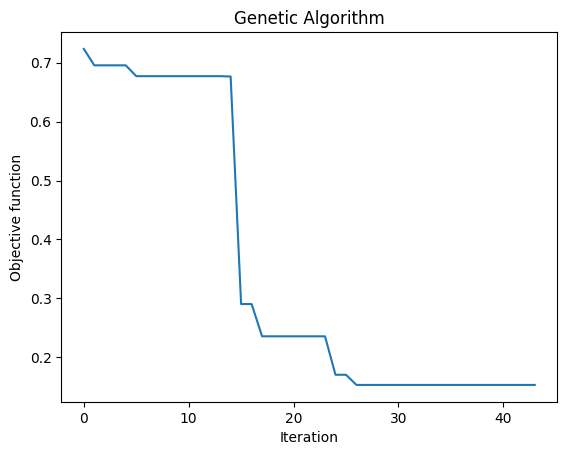

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga


varbound = np.array([          [1, 5],              # num_residual_blocks
                     [10, 500],             # residual_channels
                     [0.0005, 0.002],          # learning rate
                     [0, 3],               # batch size
                     [0, 0.01],              # L2 norm
                     [10, 30],              # sequence length
                     [0, 1],               # kernel
                     [0, 1]                # epoch
                     ])



# 创建遗传算法对象
algorithm_param = {'max_num_iteration': 50, 'population_size': 5, 'elit_ratio': 0.01,
                   'parents_portion': 0.3, 'crossover_probability': 0.5, 'mutation_probability': 0.1,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 15}
model = ga(function=TCN_fitness_function, dimension=8, variable_type='real',
           variable_type_mixed  = np.array(['int', 'int', 'real', 'int', 'real', 'int', 'int', 'int']) ,variable_boundaries=varbound,
           algorithm_parameters=algorithm_param, function_timeout = 1000)

# 运行遗传算法进行优化
model.run()

# 获得优化的超参数组合
best_params = model.output_dict['variable']




In [51]:
# Defince the parameters
num_residual_blocks = int(4.00000000e+00)
residual_channels = int(1.44000000e+01)
learning_rate = 1.51774739e-03
batch_size = [32, 64, 128, 256][int(0.00000000e+00)]
weight_decay = 1.61075565e-04
sequence_length = int(2.40000000e+01)
kernel_size, stride, padding = get_kernel_settings(int(1.00000000e+00))
epoch = [200, 500, 1000, 2000][int(1.00000000e+00)]


X_reshape, y_reshape = reshape_data(X, y, sequence_length)

# 划分训练集为新的训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size=0.2, random_state=42)

# 划分训练集为新的训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



torch.manual_seed(42)  # set the random seed

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


# Specify the batch size
batch_size = batch_size

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)



# 初始化模型和优化器
in_channels = X_train.shape[2]
#device = torch.device("cuda")
model = TCN(in_channels, num_residual_blocks, residual_channels, kernel_size, stride, padding).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.MSELoss()
num_epochs = epoch

# train!!!
best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.005)
#print('this is :', best_model_state)
#model.load_state_dict(best_model_state)



 Early stopping triggered!


In [35]:
def median_absolute_error(y_true, y_pred):
    absolute_errors = torch.abs(y_true - y_pred)
    return torch.median(absolute_errors).item()

In [36]:
def pearson_correlation(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    y_pred_mean = torch.mean(y_pred)
    numerator = torch.sum((y_true - y_true_mean) * (y_pred - y_pred_mean))
    denominator = torch.sqrt(torch.sum((y_true - y_true_mean) ** 2)) * torch.sqrt(torch.sum((y_pred - y_pred_mean) ** 2))
    pearson_corr = numerator / denominator
    return pearson_corr.item()

In [37]:
def index_of_agreement(y_true, y_pred):
    numerator = torch.sum((y_true - y_pred) ** 2)
    denominator = torch.sum((torch.abs(y_pred - torch.mean(y_true)) + torch.abs(y_true - torch.mean(y_true))) ** 2)
    index_agreement = 1 - (numerator / denominator)
    return index_agreement.item()

In [52]:
model.eval()

with torch.no_grad():
    total_mse = 0.0
    total_mae = 0.0
    total_md_ae = 0.0
    total_mape = 0.0
    total_rmspe = 0.0
    total_pearson_corr = 0.0
    total_index_agreement = 0.0

    for batch_X, batch_y in test_loader:
        # Forward pass: compute model predictions
        predictions = model(batch_X.to(device))

        # Compute the loss (assuming you have defined the loss function as 'criterion')
        mse = criterion(predictions, batch_y.to(device))
        total_mse += mse.item()

        # Compute the loss (MAE)
        mae = torch.mean(torch.abs(predictions - batch_y.to(device)))
        total_mae += mae.item()

        # Compute the loss (MdAE)
        md_ae = median_absolute_error(predictions, batch_y.to(device))
        total_md_ae += md_ae

        # Compute the loss (MAPE)
        absolute_percentage_errors = torch.abs((batch_y.to(device) - predictions) / batch_y.to(device))
        absolute_percentage_errors = absolute_percentage_errors[~torch.isinf(absolute_percentage_errors) & ~torch.isnan(absolute_percentage_errors)]
        mape = torch.mean(absolute_percentage_errors).item() * 100
        total_mape += mape

        # Compute the loss (RMSPE)
        squared_percentage_errors = ((batch_y.to(device) - predictions) / batch_y.to(device)) ** 2
        squared_percentage_errors = squared_percentage_errors[~torch.isinf(squared_percentage_errors)]
        rmspe = torch.sqrt(torch.mean(squared_percentage_errors)).item() * 100
        total_rmspe += rmspe

        # Compute the Pearson Correlation Coefficient
        pearson_corr = pearson_correlation(batch_y.to(device), predictions)
        total_pearson_corr += pearson_corr

        # Compute the Index of Agreement
        index_agreement = index_of_agreement(batch_y.to(device), predictions)
        total_index_agreement += index_agreement





        # Calculate the average loss for the entire validation set
        #print(total_mse)
    mse_loss = total_mse / len(test_loader)
    mae_loss = total_mae / len(test_loader)
    rmse_loss = np.sqrt(mse_loss)
    md_ae_loss = total_md_ae / len(test_loader)
    mape_loss = total_mape / len(test_loader)
    rmspe_loss = total_rmspe / len(test_loader)
    pearson_corr_avg = total_pearson_corr / len(test_loader)
    index_agreement_avg = total_index_agreement / len(test_loader)

print(f'MSE: {mse_loss:.4f}')
print(f'RMSE: {mae_loss:.4f}')
print(f'MAE: {rmse_loss:.4f}')
print(f'MdAE: {md_ae_loss:.4f}')
print(f'MAPE: {mape_loss:.4f}')
print(f'RMSPE: {rmspe_loss:.4f}')
print(f'Pearson Coefficient: {pearson_corr_avg:.4f}')
print(f'Index of Agreement (IoA): {index_agreement_avg:.4f}')


MSE: 4.8344
RMSE: 1.7579
MAE: 2.1987
MdAE: 1.4906
MAPE: 34.6569
RMSPE: 143.2682
Pearson Coefficient: 0.9230
Index of Agreement (IoA): 0.9583
